In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [7]:
# import dataset
df=pd.read_csv('news.csv')
df.head(20)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [9]:
# View the info of the data frame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [10]:
# Check the number of rows and columns.

df.shape

(6335, 4)

In [11]:
# Get the statistical informationa about the dataset.
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [12]:
# Check for null values. Use the is null method for it.

df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [ ]:
# We can see that all values are 0. It shows that there are no null values in the dataset. 
# So we can move further without changing anything in the dataset.

In [13]:
# Drop this unnamed column using the drop method.

# Let's drop unimportant columns.

df_drop = df.drop(columns='Unnamed: 0')

df_drop

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [14]:
# Let us see how much Real news and how much Fake news was there in the dataset. The value counts method actually returns 
# the count of a particular variable in a given feature.

df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

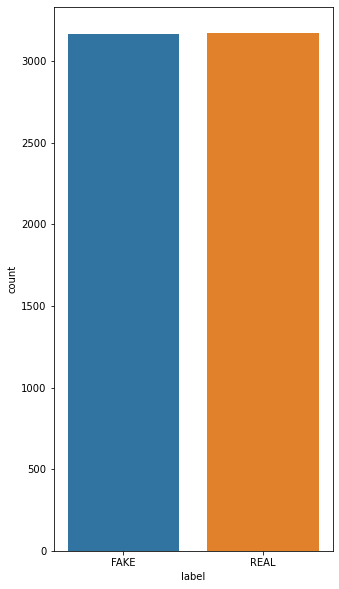

In [15]:
# There are 3171 Real news and 3164 Fake news. OMG!! probability is almost 0.5 for the news being fake so, 
# be aware of them.

# Data Visualizations

# Visualize the count plot using the seaborn library.

plt.figure(figsize=(5,10));
sns.countplot(df['label']);

In [16]:
# In the graph, we can see that both are almost similar.

# Define x and y.

# For creating a model, first, we have to define x and y in which x contains all independent features of the dataset 
# and y contains a dependent feature that is labelled.

In [17]:
df_drop.head(5)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [18]:
x = df.iloc[ : , :-1].values
y = df.iloc[ : , -1].values



In [35]:
x

array([[8476, 'You Can Smell Hillary’s Fear',
        'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI.

In [36]:
y

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype=object)

In [29]:
# Import CountVectorizer
# As we are working with text data, we have to use a count vectorizer for it. It is actually used to transform our text 
# into a vector on the basis of the frequency of each word which means how many times the word is repeated in the entire text.

# It is available in the sci-kit learn library.

# Fit_transform is used on the training dataset because it will scale our training data and learn the scaling parameters. 
# With this, our model will learn the mean and variance of the features that are there in this training dataset. 
# These parameters are used to work with test data.

from sklearn.feature_extraction.text import CountVectorizer


In [28]:
vect=CountVectorizer(stop_words="english",max_features=1000)

In [34]:
x1=vect.fit_transform(x[:,0]).todense()

AttributeError: 'int' object has no attribute 'lower'

In [32]:
x2=vect.fit_transform(x[:,1]).todense()
x2

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
df.head(2)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE


In [22]:
df.rename(columns={'unnamed': 'id'}).head(2)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE


In [11]:
# Load library
import collections

In [12]:
# Create dictionary
column_names = collections.defaultdict(str)

In [15]:
# Create keys
for name in df.columns:
    column_names[name]

In [16]:
# Show dictionary
column_names

defaultdict(str, {'Unnamed: 0': '', 'title': '', 'text': '', 'label': ''})

In [28]:
df.columns = ['id', 'title', 'text', 'label']

In [54]:
df.head(5)

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [56]:
# Create DataFrame
data_a = {'id': ['1', '2', '3'],
          'first': ['Alex', 'Amy', 'Allen'],
          'last': ['Anderson', 'Ackerman', 'Ali']}
dataframe_a = pd.DataFrame(data_a, columns = ['id', 'first', 'last'])
dataframe_a

,id,first,last
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali


In [57]:
# Create DataFrame
data_b = {'id': ['4', '5', '6'],
          'first': ['Billy', 'Brian', 'Bran'],
          'last': ['Bonder', 'Black', 'Balwner']}
dataframe_b = pd.DataFrame(data_b, columns = ['id', 'first', 'last'])
dataframe_b

,id,first,last
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner


In [59]:
# Concatenate DataFrames by rows
pdconcat = pd.concat([dataframe_a, dataframe_b], axis=0)

In [60]:
pdconcat

,id,first,last
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner


In [61]:
# Concatenate DataFrames by columns
pd.concat([dataframe_a, dataframe_b], axis=1)

,id,first,last,id,first,last
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner


In [62]:
# Create DataFrame
employee_data = {'employee_id': ['1', '2', '3', '4'],
                 'name': ['Amy Jones', 'Allen Keys', 'Alice Bees', 
                          'Tim Horton']}
dataframe_employees = pd.DataFrame(employee_data, columns = ['employee_id',
                                                             'name'])

dataframe_employees

,employee_id,name
0,1,Amy Jones
1,2,Allen Keys
2,3,Alice Bees
3,4,Tim Horton


In [64]:
# Create DataFrame
sales_data = {'employee_id': ['3', '4', '5', '6'],
              'total_sales': [23456, 2512, 2345, 1455]}
dataframe_sales = pd.DataFrame(sales_data, columns = ['employee_id',
                                                      'total_sales'])

dataframe_sales

,employee_id,total_sales
0,3,23456
1,4,2512
2,5,2345
3,6,1455


In [65]:
# Merge DataFrames
pd.merge(dataframe_employees, dataframe_sales, on='employee_id')

,employee_id,name,total_sales
0,3,Alice Bees,23456
1,4,Tim Horton,2512


In [66]:
# Merge DataFrames
pd.merge(dataframe_employees, dataframe_sales, on='employee_id', how='outer')

,employee_id,name,total_sales
0,1,Amy Jones,NaN
1,2,Allen Keys,NaN
2,3,Alice Bees,23456.0
3,4,Tim Horton,2512.0
4,5,NaN,2345.0
5,6,NaN,1455.0


In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [6]:
# Create feature matrix
features = np.array([[2, 3],
                     [3, 4],
                     [2, 3],
                     [2, 3]])

In [7]:
# Create PolynomialFeatures object
polynomial_interaction = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
# Create polynomial features
polynomial_interaction.fit_transform(features)

array([[ 2.,  3.,  4.,  6.,  9.],
       [ 3.,  4.,  9., 12., 16.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 2.,  3.,  4.,  6.,  9.]])

In [1]:
from IPython.display import HTML
import json
import pandas as pd

df_2015 = pd.read_csv('2015.csv')
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [28]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [34]:
features1 = np.array([[-2, 3],
                      [2, -3],
                      [-6, 0],
                      [1, -3],
                      [-4, np.nan]])

features1

array([[-2.,  3.],
       [ 2., -3.],
       [-6.,  0.],
       [ 1., -3.],
       [-4., nan]])

In [20]:
# Create DataFrame
dataframe = pd.DataFrame(features1, columns=["feature_1", "feature_2"])

In [21]:
dataframe

,feature_1,feature_2
0,-2,3
1,2,-3
2,-6,0
3,1,-3
4,-4,3


In [22]:
# Make k-means clusterer
clusterer = KMeans(3, random_state=0)

In [23]:
# Fit clusterer
clusterer.fit(dataframe)

KMeans(n_clusters=3, random_state=0)

In [25]:
# Predict values
dataframe["group"] = clusterer.predict(features1)

In [26]:
# View first few observations
dataframe.head(5)

,feature_1,feature_2,group
0,-2,3,0
1,2,-3,1
2,-6,0,2
3,1,-3,1
4,-4,3,0


In [35]:
features1

array([[-2.,  3.],
       [ 2., -3.],
       [-6.,  0.],
       [ 1., -3.],
       [-4., nan]])

In [37]:
features1[~np.isnan(features1).any(axis=1)]

array([[-2.,  3.],
       [ 2., -3.],
       [-6.,  0.],
       [ 1., -3.]])

In [ ]:
pip install fancyimpute


In [4]:
# Load libraries
import numpy as np
from fancyimpute import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [12]:
# Make a simulated feature matrix
features, _ = make_blobs(n_samples = 1000,
                         n_features = 2,
                         random_state = 1)

In [13]:
features

array([[-3.05837272,  4.48825769],
       [-8.60973869, -3.72714879],
       [ 1.37129721,  5.23107449],
       ...,
       [-1.91854276,  4.59578307],
       [-1.79600465,  4.28743568],
       [-6.97684609, -8.89498834]])

In [14]:
features.shape

(1000, 2)

In [20]:
# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

In [22]:
# Standardize the features
standardized_features

array([[ 0.87301861,  1.31426523],
       [-0.67073178, -0.22369263],
       [ 2.1048424 ,  1.45332359],
       ...,
       [ 1.18998798,  1.33439442],
       [ 1.22406396,  1.27667052],
       [-0.21664919, -1.19113343]])

In [23]:
# Replace the first feature's first value with a missing value
true_value = standardized_features[0,0]
standardized_features[0,0] = np.nan

In [24]:
true_value

0.8730186113995938

In [27]:
true_value1 = standardized_features[0,1]
true_value1

1.3142652289926346

In [30]:

standardized_features[0,0]

nan

In [39]:
# Predict the missing values in the feature matrix
features_knn_imputed = KNN(k=5, verbose=0).fit_transform(standardized_features)

In [40]:
# Compare true and imputed values
print("True Value:", true_value)
print("Imputed Value:", features_knn_imputed[0,0])

True Value: 0.8730186113995938
Imputed Value: 1.0955332713113226


In [2]:
# Import libraries 
import numpy as np 
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

In [5]:
# Create feature 

feature = np.array([["Texas"], 
                    ["California"],
                    ["Texas"], 
                    ["Delaware"], 
                    ["Texas"]])

In [6]:
feature

array([['Texas'],
       ['California'],
       ['Texas'],
       ['Delaware'],
       ['Texas']], dtype='<U10')

In [10]:
# View feature classes
one_hot.classes_

array(['California', 'Delaware', 'Texas'], dtype='<U10')

In [11]:
one_hot.inverse_transform(one_hot.transform(feature))

array(['Texas', 'California', 'Texas', 'Delaware', 'Texas'], dtype='<U10')

In [24]:
# Import library
import pandas as pd

In [13]:
# Create dummy variables from feature
pd.get_dummies(feature[:,0])

,California,Delaware,Texas
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


In [7]:
# Create one-hot encoder 
one_hot = LabelBinarizer()

In [8]:
# One-hot encode feature 

one_hot.fit_transform(feature)

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [9]:
# View feature classes
one_hot.classes_

array(['California', 'Delaware', 'Texas'], dtype='<U10')

In [15]:
# Create multiclass feature
multiclass_feature = [("Texas", "Florida"), 
                      ("California", "Alabama"),
                      ("Texas", "Florida"),
                      ("Delware", "Florida"),
                      ("Texas", "Alabama")]


In [21]:
multiclass_feature

[('Texas', 'Florida'),
 ('California', 'Alabama'),
 ('Texas', 'Florida'),
 ('Delware', 'Florida'),
 ('Texas', 'Alabama')]

In [17]:
# Create multiclass one-hot encoder
one_hot_multiclass = MultiLabelBinarizer()

In [18]:
# One-hot encode multiclass feature
one_hot_multiclass.fit_transform(multiclass_feature)

array([[0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1]])

In [19]:
# Once again, we can see the classes with the classes_ method:
# View classes
one_hot_multiclass.classes_

array(['Alabama', 'California', 'Delware', 'Florida', 'Texas'],
      dtype=object)

In [2]:
# Load library
import pandas as pd

In [3]:
# Create features
dataframe = pd.DataFrame({"Score": ["Low", "Low", "Medium", "Medium", "High"]})

In [4]:
dataframe

,Score
0,Low
1,Low
2,Medium
3,Medium
4,High


In [6]:
# Create mapper
scale_mapper = {"Low":1,
                "Medium":2,
                "High":3}

In [7]:
# Replace feature values with scale
dataframe["Score"].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    3
Name: Score, dtype: int64

In [37]:
def add(num):
    if type(num) == int:
        sum=0
        for x in range(0, num+1, 1):
            sum = sum + x
        return sum
    else:
        return 0
    


In [41]:
add(5)

15

In [6]:
def age_check(ages):
    adult = []
    for age in ages:
        if age >= 18:
            adult.append(age)
        return age >= 18
    
ages = [4, 23, 32, 12, 88]
print(age_check(ages))

False


In [1]:
x = True

type(x)

bool

In [2]:
shopping = ["bread","milk", "eggs"]

len(shopping)

3

In [7]:
list1 = ['bread', 'egg', 'onion']
list2 = ['carrot', 'rice', 'beans']

list = list1 + list2
list

['bread', 'egg', 'onion', 'carrot', 'rice', 'beans']

In [8]:
shopping = ["bread","milk", "eggs"]
shopping.append("apple")
print(shopping)

['bread', 'milk', 'eggs', 'apple']


In [11]:
shopping = []
shopping.append('bread')
shopping.append('milk')
shopping.append('eggs')
shopping.append('apple')
print(shopping)

['bread', 'milk', 'eggs', 'apple']


In [21]:
import numpy as np
import pandas as pd

X = [[1,2,3],
     [4,5,6],
     [7,8,9]]

Y = [[10,11,12],
     [13,14,15],
     [16,17,18]]


In [24]:
album_sales = {'barbara':150, 'aretha':75, 'madonna':300, 'mariah':220}
print( album_sales.values())

dict_values([150, 75, 300, 220])


In [42]:
def factorial_sum(number):
    n = 1
    factorial = 0
    while n in range(1, number+1, 1):
        factorial = n*(n+1)
        n = n + 1
    return factorial



In [43]:
factorial_sum(7)

56

In [1]:
# Load library
from bs4 import BeautifulSoup

In [6]:
# Create some HTML code
html = """
       <div class='full_name'><span style='font-weight:bold'>Masego</span> Azra</div>"
       """

In [4]:
# Parse html
soup = BeautifulSoup(html, "lxml")

In [5]:
# Find the div with the class "full_name", show text
soup.find("div", { "class" : "full_name" }).text

'\n       Masego Azra'

In [6]:
# Load libraries
import unicodedata
import sys

In [7]:
# Create text
text_data = ['Hi!!!! I. Love. This. Song....',
             '10000% Agree!!!! #LoveIT',
             'Right?!?!']

In [8]:
# Create a dictionary of punctuation characters
punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
                            if unicodedata.category(chr(i)).startswith('P'))

In [9]:
# For each string, remove any punctuation characters
[string.translate(punctuation) for string in text_data]

['Hi I Love This Song', '10000 Agree LoveIT', 'Right']

In [41]:
import pandas as pd
import numpy as np

In [42]:
dates = pd.date_range('1/1/2000', periods=7)
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07'],
              dtype='datetime64[ns]', freq='D')

In [43]:
ts = pd.Series(np.arange(7), index=dates)
ts

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
2000-01-07    6
Freq: D, dtype: int32

In [36]:
import numpy 
import pandas

In [37]:
# Python list
my_list_nums = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
# Numpy array
my_odd_nums = numpy.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
# Pandas series
my_series = pandas.Series(my_odd_nums)

In [38]:
my_series

0     1
1     3
2     5
3     7
4     9
5    11
6    13
7    15
8    17
9    19
dtype: int32

In [39]:
my_odd_nums

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [40]:
my_list_nums

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [50]:
df = pd.DataFrame({'name': ['Raphael', 'Donatello'],
                   'mask': ['red', 'purple'],
                   'weapon': ['sai', 'bo staff']})

data = df.to_csv(index=False)

In [51]:
df

,name,mask,weapon
0,Raphael,red,sai
1,Donatello,purple,bo staff


In [52]:
data

'name,mask,weapon\r\nRaphael,red,sai\r\nDonatello,purple,bo staff\r\n'

In [75]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

In [67]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

In [77]:
frame = pd.Series(data)
frame

state    [Ohio, Ohio, Ohio, Nevada, Nevada]
year         [2000, 2001, 2002, 2001, 2002]
pop               [1.5, 1.7, 3.6, 2.4, 2.9]
dtype: object

In [ ]:
data.

In [102]:
iris = datasets.load_iris()

In [103]:
features = iris.data
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [104]:
target = iris.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [105]:
# Create logistic regression
logistic = linear_model.LogisticRegression()

In [106]:
# Create range of candidate penalty hyperparameter values
penalty = ['l1', 'l2']

In [107]:
# Create range of candidate regularization hyperparameter values
C = np.logspace(0, 4, 10)

In [108]:
# Create dictionary hyperparameter candidates
hyperparameters = dict(C=C, penalty=penalty)

In [109]:
# Create grid search
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [110]:
# Fit grid search
best_model = gridsearch.fit(features, target)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [111]:
np.logspace(0, 4, 10)

array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])

In [112]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 7.742636826811269


In [113]:
# Predict target vector
best_model.predict(features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
# Create text
string = "The science of today is the technology of tomorrow"

K-FOLD CROSS VALIDATION USING SCIKIT LEARN

In [52]:
# Load libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pd.DATAFRAME TO np.ARRAY (SHOWING FEATURES & TARGET) COLUMNS 

CONVERTING CATEGORICAL COLUMN TO CATEGORICAL NUMERICAL

DROPPING IRRELEVANT COLUMN & INDEX COLUMN

# 11.1 Cross-Validating Models


In [114]:
# 11.1 Cross-Validating Models
# Problem
# You want to evaluate how well your model will work in the real world.
# Solution
# Create a pipeline that preprocesses the data, trains the model, and then evaluates it using cross-validation:

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
colors=['#9db1f8','#217a36','#47bc8f','#947efd','#a4d835']
sns.set_palette(sns.color_palette(colors))

In [116]:
df = pd.read_csv("car_data.csv")
df.head(10)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
5,846,Female,47,33500,1
6,219,Female,46,132500,1
7,588,Male,42,64000,0
8,85,Female,30,84500,0
9,465,Male,41,52000,0


In [117]:
df['Gender'] = pd.factorize(df['Gender'])[0]
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1
4,661,0,25,79000,0
...,...,...,...,...,...
995,863,0,38,59000,0
996,800,1,47,23500,0
997,407,1,28,138500,1
998,299,1,48,134000,1


In [118]:
# Extracting the relevant 3 column features and converting them numpy array of data

In [119]:
features = np.array(df[['Gender', 'Age', 'AnnualSalary']])

In [120]:
features

array([[     0,     35,  20000],
       [     0,     40,  43500],
       [     0,     49,  74000],
       ...,
       [     1,     28, 138500],
       [     1,     48, 134000],
       [     1,     44,  73500]], dtype=int64)

In [121]:
features.shape

(1000, 3)

In [122]:
target = np.array(df[['Purchased']])
target

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [123]:
# Target column (number of columns and rows)
target.shape

(1000, 1)

In [124]:
# Load libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [125]:
# Create standardizer
standardizer = StandardScaler()

In [126]:
# Create logistic regression object
logit = LogisticRegression()

In [127]:
# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

In [128]:
# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [129]:
# Conduct k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             features, # Feature matrix
                             target, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

In [130]:
# Calculate mean
cv_results

array([0.89, 0.82, 0.75, 0.89, 0.75, 0.86, 0.83, 0.82, 0.82, 0.88])

In [131]:
cv_results.mean()

0.8310000000000001

# 11.2 Creating a Baseline Regression Model

In [69]:
# Import the dataset
import pandas as pd

df_2015 = pd.read_csv('2015.csv')
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [90]:
df_2015.shape

(158, 12)

In [91]:
# Separate the data into features and target.
# Convert the dataset into numpy array.
# Drop irrelevant columns in the dataset
import numpy as np
features1 = np.array(df_2015[['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']])
features1

array([[7.587  , 0.03411, 1.39651, ..., 0.66557, 0.41978, 0.29678],
       [7.561  , 0.04884, 1.30232, ..., 0.62877, 0.14145, 0.4363 ],
       [7.527  , 0.03328, 1.32548, ..., 0.64938, 0.48357, 0.34139],
       ...,
       [3.006  , 0.05015, 0.6632 , ..., 0.15684, 0.18906, 0.47179],
       [2.905  , 0.08658, 0.0153 , ..., 0.1185 , 0.10062, 0.19727],
       [2.839  , 0.06727, 0.20868, ..., 0.36453, 0.10731, 0.16681]])

In [92]:
features1.shape

(158, 8)

In [93]:
target1 = np.array(df_2015[['Dystopia Residual']])
target1

array([[2.51738],
       [2.70201],
       [2.49204],
       [2.46531],
       [2.45176],
       [2.61955],
       [2.4657 ],
       [2.37119],
       [2.26425],
       [2.26646],
       [3.08854],
       [3.17728],
       [2.5332 ],
       [3.60214],
       [2.51011],
       [3.26001],
       [1.96961],
       [1.9757 ],
       [2.41484],
       [2.24743],
       [1.96994],
       [2.47489],
       [3.19131],
       [1.88501],
       [2.84848],
       [2.11569],
       [2.67585],
       [1.55674],
       [2.21126],
       [2.836  ],
       [2.67782],
       [2.32142],
       [2.85737],
       [2.31945],
       [2.43872],
       [2.12367],
       [1.6488 ],
       [2.32323],
       [1.87634],
       [2.79094],
       [2.26882],
       [3.035  ],
       [2.74255],
       [2.23741],
       [2.24639],
       [1.68435],
       [2.21978],
       [2.53942],
       [1.73797],
       [2.02518],
       [2.82334],
       [3.10712],
       [2.18896],
       [2.24729],
       [1.61583],
       [2.

In [95]:
target1.shape

(158, 1)

In [75]:
# Load libraries
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [96]:
# Make test and training split
features1_train, features1_test, target1_train, target1_test = train_test_split(
    features1, target1, random_state=0)

In [97]:
# Create a dummy regressor
dummy = DummyRegressor(strategy='mean')

In [98]:
# "Train" dummy regressor
dummy.fit(features1_train, target1_train)

DummyRegressor()

In [102]:
# Get R-squared score
dummy.score(features1_test, target1_test)

-0.0009556857877641711

In [103]:
# To compare, we train our model and evaluate the performance score:

In [104]:
# Load library
from sklearn.linear_model import LinearRegression

In [105]:
# Train simple linear regression model
ols = LinearRegression()
ols.fit(features1_train, target1_train)

LinearRegression()

In [106]:
# Get R-squared score
ols.score(features1_test, target1_test)

0.999999648899115

# 11.3 Creating a Baseline Classification Model

In [132]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

In [133]:
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1
4,661,0,25,79000,0
...,...,...,...,...,...
995,863,0,38,59000,0
996,800,1,47,23500,0
997,407,1,28,138500,1
998,299,1,48,134000,1


In [134]:
features = np.array(df[['Gender', 'Age', 'AnnualSalary']])
features

array([[     0,     35,  20000],
       [     0,     40,  43500],
       [     0,     49,  74000],
       ...,
       [     1,     28, 138500],
       [     1,     48, 134000],
       [     1,     44,  73500]], dtype=int64)

In [135]:
target

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [136]:
# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)

In [137]:
# Create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)

In [138]:
# "Train" model
dummy.fit(features_train, target_train)

DummyClassifier(random_state=1, strategy='uniform')

In [139]:
# Get accuracy score
dummy.score(features_test, target_test)

0.508

In [140]:
# By comparing the baseline classifier to our trained classifier, we can see the improvement:

In [141]:
# Load library
from sklearn.ensemble import RandomForestClassifier

In [142]:
# Create classifier
classifier = RandomForestClassifier()

In [143]:
# Train model
classifier.fit(features_train, target_train)

C:\Users\Oluwaseun Alade\AppData\Local\Temp\ipykernel_9052\1099743955.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(features_train, target_train)


RandomForestClassifier()

In [144]:
# Get accuracy score
classifier.score(features_test, target_test)

0.888

# Plotting, Visualization, and Storytelling

In [146]:
df.head(5)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1
4,661,0,25,79000,0


In [158]:
df_results = df[(df.Gender == 1) &
                (df.Age >20) & 
                (df.AnnualSalary >60000)]

df_results

,User ID,Gender,Age,AnnualSalary,Purchased
6,219,1,46,132500,1
8,85,1,30,84500,0
12,790,1,32,72500,0
14,118,1,42,108000,1
15,54,1,33,149000,1
...,...,...,...,...,...
993,476,1,54,136500,0
994,951,1,53,104000,1
997,407,1,28,138500,1
998,299,1,48,134000,1


In [159]:
df_results.shape

(306, 5)

In [160]:
df_results = df_results.sort_values(by='AnnualSalary', ascending=False)
df_results

,User ID,Gender,Age,AnnualSalary,Purchased
95,485,1,33,151500,1
272,941,1,34,150500,1
570,966,1,32,150000,1
297,130,1,38,149500,1
15,54,1,33,149000,1
...,...,...,...,...,...
573,893,1,42,61500,0
927,388,1,36,61500,0
866,908,1,39,61000,0
49,27,1,40,60500,0


In [ ]:
# Now, we want to visually display the distribution of the values in the AnnualSalary column. 
# We can pass an array of values into the default hist() plot using the following command:

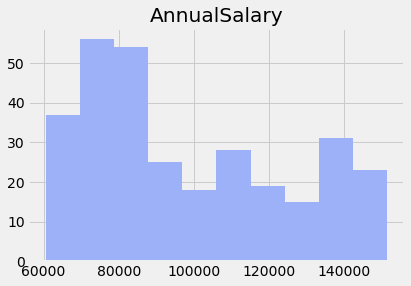

In [162]:
df_results.hist(column='AnnualSalary');

In [163]:
df_results["AnnualSalary"].describe()

count       306.000000
mean      98068.627451
std       26867.498729
min       60500.000000
25%       75000.000000
50%       89500.000000
75%      118500.000000
max      151500.000000
Name: AnnualSalary, dtype: float64

# Understanding outliers and trends
# BOX PLOT

In [ ]:
# Let's continue to analyze our existing dataset and see how it would be visualized using a
# box plot. Similar to the prior example, we will load all of the data from the source into a
# single DataFrame and then create a subset DataFrame using filters.

In [25]:
# Import the following libraries by adding the following command in your Jupyter
# Notebook and run the cell. Feel free to follow along by creating your own
# Notebook; I have placed a copy on GitHub for reference:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# Import the dataset
import pandas as pd

df_2015 = pd.read_csv('2015.csv', header=0)
df_2015.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [27]:
df_2015.shape

(158, 12)

In [46]:
# Filter our dataFrame for the information we want to focus on.
df_results = df_2015[(df_2015.Family <1.40) & 
                     ((df_2015.Region == 'Western Europe') | (df_2015.Region == 'North America'))]

df_results.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


In [36]:
df_results.shape

(22, 12)

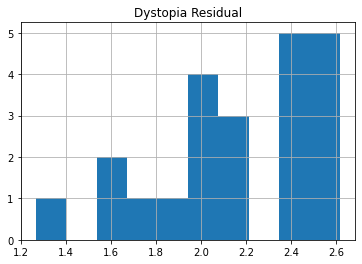

In [41]:
df_results.hist(column='Dystopia Residual');

In [42]:
df_results['Dystopia Residual'].describe()

count    22.000000
mean      2.156125
std       0.365310
min       1.264620
25%       1.969693
50%       2.167465
75%       2.465603
max       2.619550
Name: Dystopia Residual, dtype: float64

In [45]:
# Box Plot

<AxesSubplot:title={'center':'Generosity'}, xlabel='Region'>

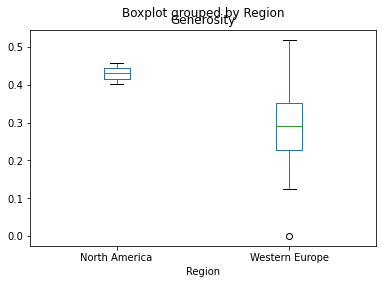

In [53]:
df_results.boxplot(by='Region', column=['Generosity'], grid=False)

# 12.1 Selecting Best Models Using Exhaustive Search

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
colors=['#9db1f8','#217a36','#47bc8f','#947efd','#a4d835']
sns.set_palette(sns.color_palette(colors))

In [118]:
df = pd.read_csv("car_data.csv")
df.head(5)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [119]:
df['Gender'] = pd.factorize(df['Gender'])[0]
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1
4,661,0,25,79000,0
...,...,...,...,...,...
995,863,0,38,59000,0
996,800,1,47,23500,0
997,407,1,28,138500,1
998,299,1,48,134000,1


In [122]:
df.isna().sum().sum()

0

In [120]:
features = np.array(df[['Gender', 'Age', 'AnnualSalary']])
features

array([[     0,     35,  20000],
       [     0,     40,  43500],
       [     0,     49,  74000],
       ...,
       [     1,     28, 138500],
       [     1,     48, 134000],
       [     1,     44,  73500]], dtype=int64)

In [124]:
target = np.array(df[['Purchased']])
target

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [125]:
# Use scikit-learn’s GridSearchCV:
# Load libraries
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [126]:
# Create logistic regression
logistic = linear_model.LogisticRegression()

In [127]:
# Create range of candidate penalty hyperparameter values
penalty = ['l1', 'l2']

In [142]:
# Create range of candidate regularization hyperparameter values
C = np.logspace(0, 4, 20)

In [143]:
# Create dictionary hyperparameter candidates
hyperparameters = dict(C=C, penalty=penalty)

In [144]:
# Create grid search
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [145]:
# Fit grid search
best_model = gridsearch.fit(features, target)

c:\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

In [146]:
np.logspace(0, 4, 10)

array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])

In [147]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [148]:
# Predict target vector
best_model.predict(features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# 12.2 Selecting Best Models Using Randomized Search

In [20]:
import numpy as np
import pandas as pd
df = pd.read_csv("car_data.csv")
df.head(5)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [21]:
df['Gender'] = pd.factorize(df['Gender'])[0]
df.head(10)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1
4,661,0,25,79000,0
5,846,1,47,33500,1
6,219,1,46,132500,1
7,588,0,42,64000,0
8,85,1,30,84500,0
9,465,0,41,52000,0


In [115]:
df.isna().sum().sum()

0

In [116]:
df.shape

(1000, 5)

In [76]:
features = np.array(df[['Age', 'AnnualSalary']])
features

array([[    35,  20000],
       [    40,  43500],
       [    49,  74000],
       ...,
       [    28, 138500],
       [    48, 134000],
       [    44,  73500]], dtype=int64)

In [77]:
target = np.array(df[['Purchased']])
target

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [78]:
# Problem
# You want a computationally cheaper method than exhaustive search to select the best model.

In [79]:
# Use scikit-learn’s RandomizedSearchCV:
# Load libraries
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.model_selection import RandomizedSearchCV

In [80]:
features

array([[    35,  20000],
       [    40,  43500],
       [    49,  74000],
       ...,
       [    28, 138500],
       [    48, 134000],
       [    44,  73500]], dtype=int64)

In [81]:
target

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [82]:
# Create logistic regression
logistic = linear_model.LogisticRegression()

In [83]:
# Create range of candidate regularization penalty hyperparameter values
penalty = ['l1', 'l2']

In [84]:
# Create distribution of candidate regularization hyperparameter values
C = uniform(loc=0, scale=4)

In [85]:
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [86]:
# Create randomized search
randomizedsearch = RandomizedSearchCV(
    logistic, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0,
    n_jobs=-1)

In [87]:
# Fit randomized search
best_model = randomizedsearch.fit(features, target)

c:\python38\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
230 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "c:\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' 

In [88]:
# Define a uniform distribution between 0 and 4, sample 10 values
uniform(loc=0, scale=4).rvs(10)

array([3.11348353, 2.86616959, 2.34577221, 1.30127595, 0.65403508,
       1.16305449, 0.35308319, 2.51952383, 0.09215024, 3.65993372])

In [89]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 3.730229437354635


In [90]:
# Predict target vector
best_model.predict(features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
age = input("Enter Your age: ")
firstName = input("Enter your firstname: ")
myAge = int(age)
firstName = str(firstName)
calculation = 2022-myAge+100
finalAge = str(calculation)

print("Hello " + firstName + ", you will 100years in " + finalAge)

In [ ]:
number = input("Enter your Number: ")
if (number%2)>0:
    print("The number input is Odd Number")
else:
    print("The number input is Even Number")

In [6]:
number = input("Enter a number: ")
my_integerNumber = int(number)
half = int(my_integerNumber/2)
for i in range(1, (half+1), 1):
    if my_integerNumber%i ==0: print(i)

Enter a number:  10000


1
2
4
5
8
10
16
20
25
40
50
80
100
125
200
250
400
500
625
1000
1250
2000
2500
5000


In [16]:
a = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
b = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

common = []
for i in a and b:
    common.append(i)
print(common)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [24]:
# Python program to find out the average of a set of integers
integerNumber = (10,10,10,10,10)
sum = 0
for i in integerNumber:
    sum = sum + i
    
print(sum/len(integerNumber))
    

10.0


In [28]:
# Python program to find the product of a set of real numbers

realNumber = (10,10,10,5)
product = 1
for i in realNumber:
    product = product * i
    
print(product)


5000


In [39]:
# Python program to convert integer to string
integerNumber = input("Enter your Integer: ")
splitNumber = integerNumber.split(",")
print(splitNumber)

Enter your Integer:  56789


['56789']


In [11]:
mystring = input("Input your string: ")
reverseString = mystring[::-1]
if mystring == reverseString:
    print("The string is Palindrome")
else:
    print("The string is not palindrome")

Input your string:  oyo


The string is Palindrome


In [45]:
myInput = input("Enter your chosen integer: ")
convertInteger = int(myInput)
sum=0
for i in range(1,(convertInteger+1),1):
    sum = sum + i
print(sum)


Enter your chosen integer:  7


28


In [55]:
def myInputNumber(myInput):
    if type(myInput)!= int: 
        sum=0
    else:
        sum=0
        for i in range(1,(myInput+1),1):
            sum = sum + i
    print(sum)

In [60]:
a = 10
myInputNumber(a)

55


In [98]:
# Python program to find the sum of the digits of an integer
number = input("Enter the number: ")
digits = []
arrayNumber = []
sum=0
for i in number: 
    digits.append(i)
for j in digits: 
    arrayNumber.append(int(j))
    
for k in arrayNumber:
    sum = sum + k

print(sum)



Enter the number:  5


5


In [8]:
# Python program to find the sum of the digits of an integer
number = input("Enter the number: ")

stringnum = number.split(",")

print(stringnum)

Enter the number:  12345


['12345']


# Python program to display all integers within the range 100-200 whose sum of digits is an 
# even number.

In [29]:
# Python program to display all integers within the range 100-200 whose sum of digits is an 
# even number.

def sumdigitEven(my_range):
    even_number_list = []
    for i in range(my_range[0], my_range[1], 1):
        sum=0
        for j in str(i):
            sum=sum+int(j)
        if (sum%2)==0:
            even_number_list.append(i)
                
    return even_number_list
    

In [30]:
my_range = [100, 200]
sumdigitEven(my_range)

[101,
 103,
 105,
 107,
 109,
 110,
 112,
 114,
 116,
 118,
 121,
 123,
 125,
 127,
 129,
 130,
 132,
 134,
 136,
 138,
 141,
 143,
 145,
 147,
 149,
 150,
 152,
 154,
 156,
 158,
 161,
 163,
 165,
 167,
 169,
 170,
 172,
 174,
 176,
 178,
 181,
 183,
 185,
 187,
 189,
 190,
 192,
 194,
 196,
 198]

In [23]:
# Python program to display all integers within the range 100-200 whose sum of digits is an 
# even number.

def sumdigitEven(my_range):
    even_number_list = []
    for i in range(my_range[0], my_range[1], 1):
        sum=0
        for j in str(i):
            sum=sum+int(j)
        if (sum%2)==0:
            even_number_list.append(i)
                
    return even_number_list
    

In [24]:
my_range = [100, 200]
sumdigitEven(my_range)

[101,
 103,
 105,
 107,
 109,
 110,
 112,
 114,
 116,
 118,
 121,
 123,
 125,
 127,
 129,
 130,
 132,
 134,
 136,
 138,
 141,
 143,
 145,
 147,
 149,
 150,
 152,
 154,
 156,
 158,
 161,
 163,
 165,
 167,
 169,
 170,
 172,
 174,
 176,
 178,
 181,
 183,
 185,
 187,
 189,
 190,
 192,
 194,
 196,
 198]

In [6]:
# Python program to find the sum of the digits of an integer.
integerNum = input("Enter your integer: ")
intArray = []
sum = 0
for i in integerNum:
    intArray.append(int(i))
for j in intArray:
    sum = sum + j
    
    
print(sum)

Enter your integer:  500


5


In [22]:
# Python program to check if a given integer is a prime number or not
integerNum = input("Enter the Integer: ")
my_integer = int(integerNum)
checklist = []
for i in range(2, my_integer, 1):
    if (my_integer%i) == 0:
        checklist.append(1)   # Check for not prime number and returns 1
    else:
        checklist.append(2)  # check for prime number and returns 2

y = checklist.count(1)   # Not a prime number
x = checklist.count(2)   # a prime number
        
if y>1:
    print("Not Prime Number")
else:
    print("Prime Number")

In [25]:
is_prime(12)

'Not prime number'

In [61]:
# Python program to check if a given integer is a prime number or not
def is_prime(n):
    for i in range(2,n):
        if (n%i) == 0:
            return False
    return True

In [62]:
is_prime(7)

True

In [9]:
# Python program to display all the multiples of 3 within the range 10 to 50

def multiple_of_three(my_range):
    my_multiple = []
    for i in range(my_range[0], my_range[1], 1):
        if (i%3)==0: my_multiple.append(i)
    return my_multiple


In [10]:
my_range=[10,50]
multiple_of_three(my_range)

[12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48]

In [60]:
# Python program to check if a given integer is a prime number or not
integerNum = input("Enter the Integer: ")
my_integer = int(integerNum)
checklist = []
for i in range(2, my_integer, 1):
    if (my_integer%i) == 0:
        checklist.append(1)   # Check for not prime number and returns 1
    else:
        checklist.append(2)  # check for prime number and returns 2

y = checklist.count(1)   # Not a prime number
x = checklist.count(2)   # a prime number
        
if y>1:
    print("Not Prime Number")
else:
    print("Prime Number")

Enter the Integer:  17


Prime Number


In [14]:
class Number:
    def addition(self, a, b):
        return (a+b)
    
    def __init__(self, x, y):
        print (x+y)
    
    
d = Number(10, 90)


100


In [21]:
class Student:
    def __init__(self, name, age, grade):
        self.name = name
        self.age = age
        self.grade = grade     # 0 to 100
        
    def get_grade(self):
        return self.grade
    
    

class Course:
    def __init__(self, name, max_students):
        self.name = name
        self.max_students = max_students
        self.students = []
        
    def add_student(self, student):
        if len(self.students) < self.max_students:
            self.students.append(student)
            return True
        return False
    
    def get_average_grade(self):
        value = 0
        for student in self.students:
            value += student.get_grade()
        return value/len(self.students)
        

s1 = Student("Tim", 19, 95)
s2 = Student("Bill", 19, 75)
s3 = Student("Jill", 19, 65)

course = Course("Science", 2)
course.add_student(s1)
course.add_student(s2)
course.add_student(s3)

print(course.get_average_grade())

        

85.0


In [16]:
# Python program to generate the prime numbers from 1 to N

number_N = input("Enter the number: ")
integer_N = int(number_N)
prime_number = []

for i in range(2, integer_N+1, 1):  # List of integers to be used as divisors for the input integer N
    check = []
    for j in range(2, i, 1):
        remains = (i % j)
        check.append(remains)
    y = check.count(0)
    if y==0:
        prime_number.append(i)
                      
print("The prime from 1 to " + number_N + " are " + str(prime_number))

Enter the number:  120


The prime from 1 to 120 are [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113]


In [15]:
class Employee:
    
    def __init__(self, firstname, lastname, employeeid, position, salary):
        self.firstname = firstname
        self.lastname = lastname
        self.employeeid = employeeid
        self.position = position
        self.salary = salary
        
    def compute_employee_tax(self):
        tax = (self.salary) * (10/100)
        print (f"(Firstname: {self.firstname}) (Lastname: {self.lastname}) (EmployeeID: {self.employeeid}) (Tax: {tax})")
        
           
    def __str__(self):
            return f"(Firstname: {self.firstname}) (Lastname: {self.lastname}) (Employee: {self.employeeid})"
        
    

              
        
employee_001 = Employee("funmilayo", "ogunfolabi", "emp001", "sales manager", 400000)
employee_002 = Employee("Lawrence", "Alade", "emp002", "General Manager", 500000)


print(employee_001.compute_employee_tax())
print(employee_002.compute_employee_tax())



(Firstname: funmilayo) (Lastname: ogunfolabi) (EmployeeID: emp001) (Tax: 40000.0)
None
(Firstname: Lawrence) (Lastname: Alade) (EmployeeID: emp002) (Tax: 50000.0)
None


In [16]:
employee_001.firstname

'funmilayo'

In [17]:
employee_002.salary

500000

In [18]:
print(employee_001)

(Firstname: funmilayo) (Lastname: ogunfolabi) (Employee: emp001)
